In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import math

In [4]:
data=pd.read_csv("/home/skyline/Downloads/datasets/migration.csv")

In [5]:
data.shape

(500, 5)

In [6]:
data.describe()

,agri_field_size,members_family,caste,alt_occu,migration
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,40.944000,5.856000,2.282000,0.526000,0.474000
std,10.162648,2.296478,0.779546,0.499824,0.499824
min,13.000000,1.000000,1.000000,0.000000,0.000000
25%,34.000000,4.000000,2.000000,0.000000,0.000000
50%,41.000000,6.000000,2.000000,1.000000,0.000000
75%,48.000000,8.000000,3.000000,1.000000,1.000000
max,69.000000,10.000000,3.000000,1.000000,1.000000


In [7]:
data.head(8)

,agri_field_size,members_family,caste,alt_occu,migration
0,37,4,1,0,1
1,28,7,3,0,1
2,43,5,3,1,0
3,53,8,2,0,1
4,52,9,2,0,1
5,58,8,1,0,0
6,19,1,3,0,1
7,38,6,1,0,1


In [8]:
list(data.columns)

['agri_field_size', 'members_family', 'caste', 'alt_occu', 'migration']

#####  Linear Probability Model (P = a + b1*X1 + B2*X2 + B3*X3)

# Model 1

In [51]:
import statsmodels.api as sm
x = data ['agri_field_size']
y = data ['migration']
x = sm.add_constant(x)
model1 = sm.OLS(y, x).fit()
predictions = model1.predict(x) 

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              migration   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     500.7
Date:                Thu, 11 Nov 2021   Prob (F-statistic):           2.83e-77
Time:                        19:19:24   Log-Likelihood:                -188.25
No. Observations:                 500   AIC:                             380.5
Df Residuals:                     498   BIC:                             388.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.8999      0.066     28.939      0.000       1.771       2.029
agri_field_size    -0.0348      0.002    -22.377      0.000      -0.038      -0.032
==============================================================================
Omnibus:                       14.955   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                7.580
Skew:                          -0.028   Prob(JB):                       0.0226
Kurtosis:                       2.399   Cond. No.                         175.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficient of Agricultural Field Size is -0.0348. This means that when 1 unit of Field Size increases, the probablity of migration decreases by 3.48%. Since the p-value in this case is less than 0.05, this claim is valid.

We will create another model, wherein we consider all the variables as independent variables to see the impact of each variable on the probability.

# Model 2

In [15]:
import statsmodels.api as sm
x = data [['agri_field_size', 'members_family', 'caste', 'alt_occu']]
y = data ['migration']
x = sm.add_constant(x)
model2 = sm.OLS(y, x).fit()
predictions = model2.predict(x) 

# Print out the statistics
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              migration   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     500.7
Date:                Thu, 11 Nov 2021   Prob (F-statistic):           2.83e-77
Time:                        18:57:15   Log-Likelihood:                -188.25
No. Observations:                 500   AIC:                             380.5
Df Residuals:                     498   BIC:                             388.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.8999      0.066     28.939      0.000       1.771       2.029
agri_field_size    -0.0348      0.002    -22.377      0.000      -0.038      -0.032
==============================================================================
Omnibus:                       14.955   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                7.580
Skew:                          -0.028   Prob(JB):                       0.0226
Kurtosis:                       2.399   Cond. No.                         175.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here, all the variables except caste are significantly impacting the probability. 

# Regression Diagnostics

In [18]:
%matplotlib inline
from statsmodels.compat import lzip
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sm
import matplotlib.pyplot as plt


# Normality of the residuals

In [20]:
name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test = sm.jarque_bera(model1.resid)
lzip(name, test)

[('Jarque-Bera', 7.579798894090441),
 ('Chi^2 two-tail prob.', 0.022597874019887745),
 ('Skew', -0.02811222687869146),
 ('Kurtosis', 2.3994426274567724)]

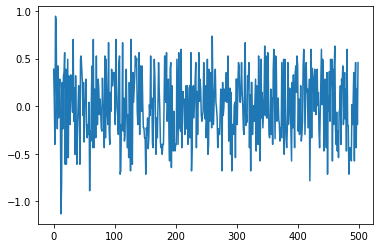

In [21]:
plt.plot(model1.resid)

###### Omnibus/Prob(Omnibus) – a test of skewness & kurtosis of residual --> a value close to zero indicate normalcy. The Prob (Omnibus) performs a statistical test indicating the probability that the residuals are normally distributed --> expected value close to 1. A linear regression approach would probably be better than random guessing but likely not as good as a nonlinear approach.

In [ ]:
name = ["Chi^2", "Two-tail probability"]
test = sms.omni_normtest(model1.resid)
lzip(name, test)

In [ ]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2

fig, ax = plt.subplots(figsize=(8, 6))
fig = plot_leverage_resid2(model2, ax=ax)

# Multicollinearity

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  
 
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
  
print(vif_data)

           feature        VIF
0            const  33.162266
1  agri_field_size   1.004786
2   members_family   1.004198
3            caste   1.002366
4         alt_occu   1.007765


# Heteroskedasticity

Errors should have constant variance. If not, it is the problem of heteroskedasticity. It is treated by transforming the variables e.g. using log.

It is tested by the Breuschpagan Test.

In [24]:
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sm.het_breuschpagan(model1.resid, model1.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 2.6391431504473872),
 ('p-value', 0.1042597615082748),
 ('f-value', 2.6425346321943297),
 ('f p-value', 0.10467006909702448)]

### Goldfeld-Quandt test

In [27]:
name = ["F statistic", "p-value"]
test = sm.het_goldfeldquandt(model1.resid, model1.model.exog)
lzip(name, test)

[('F statistic', 0.8401615229872168), ('p-value', 0.9145161373213795)]

#### Linearity: Harvey-Collier multiplier test for Null hypothesis that the linear specification is correct:

In [29]:
name = ["t value", "p value"]
test = sm.linear_harvey_collier(model1)
lzip(name, test)

[('t value', -0.9137096137108411), ('p value', 0.3613133836261211)]

# Logistic Regression

In [31]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [32]:
data=pd.read_csv("/home/skyline/Downloads/datasets/migration.csv")
data = data.dropna()
print(data.shape)
print(list(data.columns))

(500, 5)
['agri_field_size', 'members_family', 'caste', 'alt_occu', 'migration']


In [33]:
data['migration'].value_counts()

0    263
1    237
Name: migration, dtype: int64

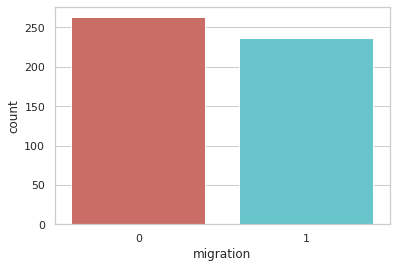

<Figure size 432x288 with 0 Axes>

In [34]:
sns.countplot(x='migration',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [35]:
count_no_sub = len(data[data['migration']==0])
count_sub = len(data[data['migration']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no migration is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of migration", pct_of_sub*100)

percentage of no migration is 52.6
percentage of migration 47.4


In [36]:
data.groupby('migration').mean()

,agri_field_size,members_family,caste,alt_occu
migration,,,,
0,47.768061,5.296578,2.292776,0.596958
1,33.371308,6.476793,2.270042,0.447257


In the above table, we have collected the mean of the distribution according to migration. People who have migrated have an average land value of 33.37, and those who didn't migrate have an average land value of 47.768. Similarly, we can see the results for the rest of the variables. 

Now, we will plot a graph of migration behaviour w.r.t. family members:

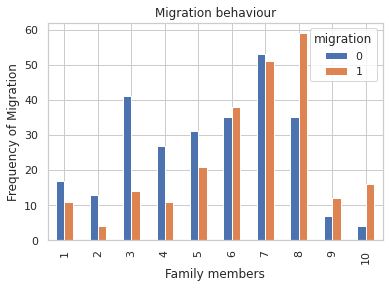

In [37]:
%matplotlib inline
pd.crosstab(data.members_family,data.migration).plot(kind='bar')
plt.title('Migration behaviour')
plt.xlabel('Family members')
plt.ylabel('Frequency of Migration')
plt.savefig('purchase_fre_job')

With the help of the above graph, we can that as the number of family members increases, people start migrating. People who have less family members migrate, and people having more family members tend to migrate.

This is a stacked bar chart of agricultural land versus migration behaviour. We see that people who have more land do not migrate, and people have less or no agricultural land, they migrate.

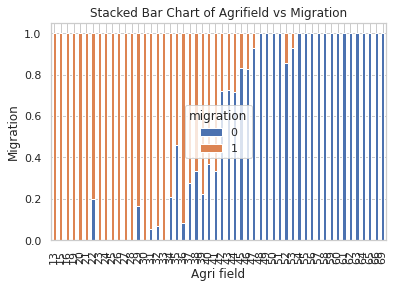

In [38]:
table=pd.crosstab(data.agri_field_size,data.migration)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Agrifield vs Migration')
plt.xlabel('Agri field')
plt.ylabel('Migration')
plt.savefig('agri_vsmigration')

In [41]:
cols=['agri_field_size', 'members_family', 'alt_occu', 'caste']
X=data[cols]
y=data['migration']
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.394439
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.430     
Dependent Variable: migration        AIC:              402.4388  
Date:               2021-11-11 19:03 BIC:              419.2972  
No. Observations:   500              Log-Likelihood:   -197.22   
Df Model:           3                LL-Null:          -345.90   
Df Residuals:       496              LLR p-value:      3.7157e-64
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
agri_field_size  -0.1775   0.0164 -10.8216 0.0000 -0.2096 -0.1453
members_family    0.8022   0.0795  10.0945 0.0000  0.6465  0.9580


In [42]:
cols=['agri_field_size', 'members_family', 'caste', 'alt_occu'] 
X=data[cols]
y=data['migration']
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.394439
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.430     
Dependent Variable: migration        AIC:              402.4388  
Date:               2021-11-11 19:03 BIC:              419.2972  
No. Observations:   500              Log-Likelihood:   -197.22   
Df Model:           3                LL-Null:          -345.90   
Df Residuals:       496              LLR p-value:      3.7157e-64
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
agri_field_size  -0.1775   0.0164 -10.8216 0.0000 -0.2096 -0.1453
members_family    0.8022   0.0795  10.0945 0.0000  0.6465  0.9580


# Calculating the accuracy of the model


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [44]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.97


In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[78  2]
 [ 2 68]]


In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        80
           1       0.97      0.97      0.97        70

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



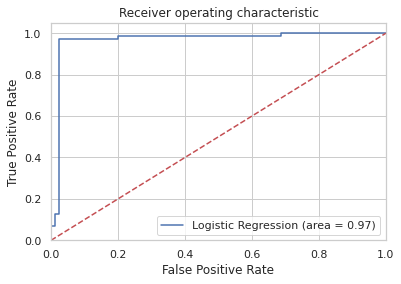

In [47]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()